## 135 - Reading GRIB files


[Youtube](https://www.youtube.com/watch?v=yLoudFv3hAY)

[Example Data](https://tgftp.nws.noaa.gov/SL.us008001/ST.opnl/DF.gr2/DC.ndfd/AR.conus/VP.001-003/)

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pygrib
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset('ds.apt.bin', engine = 'cfgrib')
ds

<xarray.Dataset>
Dimensions:            (step: 42, y: 1377, x: 2145)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 01:00:00 ... 2 days 06:00:00
    heightAboveGround  float64 ...
    latitude           (y, x) float64 ...
    longitude          (y, x) float64 ...
    valid_time         (step) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    unknown            (step, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             8
    GRIB_centreDescription:  US National Weather Service - NWSTG 
    GRIB_subCentre:          65535
    Conventions:             CF-1.7
    institution:             US National Weather Service - NWSTG 
    history:                 2023-03-10T15:40 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
t0_ds = ds.isel(step = 0)
t0_ds

<xarray.Dataset>
Dimensions:            (y: 1377, x: 2145)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] 01:00:00
    heightAboveGround  float64 ...
    latitude           (y, x) float64 ...
    longitude          (y, x) float64 ...
    valid_time         datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    unknown            (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             8
    GRIB_centreDescription:  US National Weather Service - NWSTG 
    GRIB_subCentre:          65535
    Conventions:             CF-1.7
    institution:             US National Weather Service - NWSTG 
    history:                 2023-03-10T15:40 GRIB to CDM+CF via cfgrib-0.9.1...

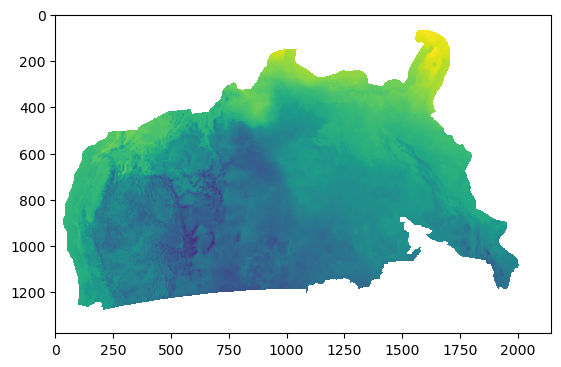

In [6]:
plt.imshow(t0_ds.unknown)

In [7]:
grbs = pygrib.open('ds.apt.bin')

In [8]:
grbs.seek(0)

In [9]:
for grb in grbs:
	print(grb)

1:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 1 hrs:from 202211141800
2:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 2 hrs:from 202211141800
3:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 3 hrs:from 202211141800
4:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 4 hrs:from 202211141800
5:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 5 hrs:from 202211141800
6:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 6 hrs:from 202211141800
7:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 7 hrs:from 202211141800
8:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 8 hrs:from 202211141800
9:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 9 hrs:from 202211141800
10:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 10 hrs:from 202211141800
11:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 11 hrs:from 202211141800
12:193

In [10]:
grbs.seek(0)
grb = grbs[1]
grb

1:193:193 (instant):lambert:heightAboveGround:level 2 m:fcst time 1 hrs:from 202211141800

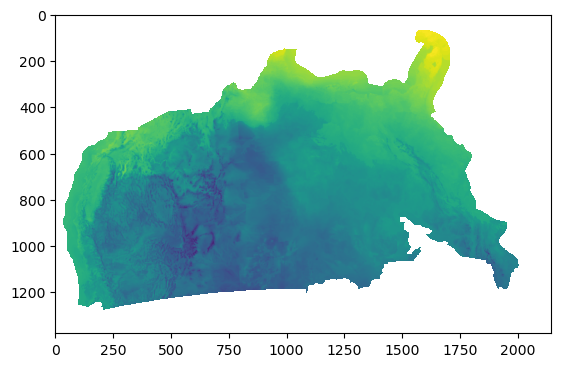

In [11]:
plt.imshow(grb.values)

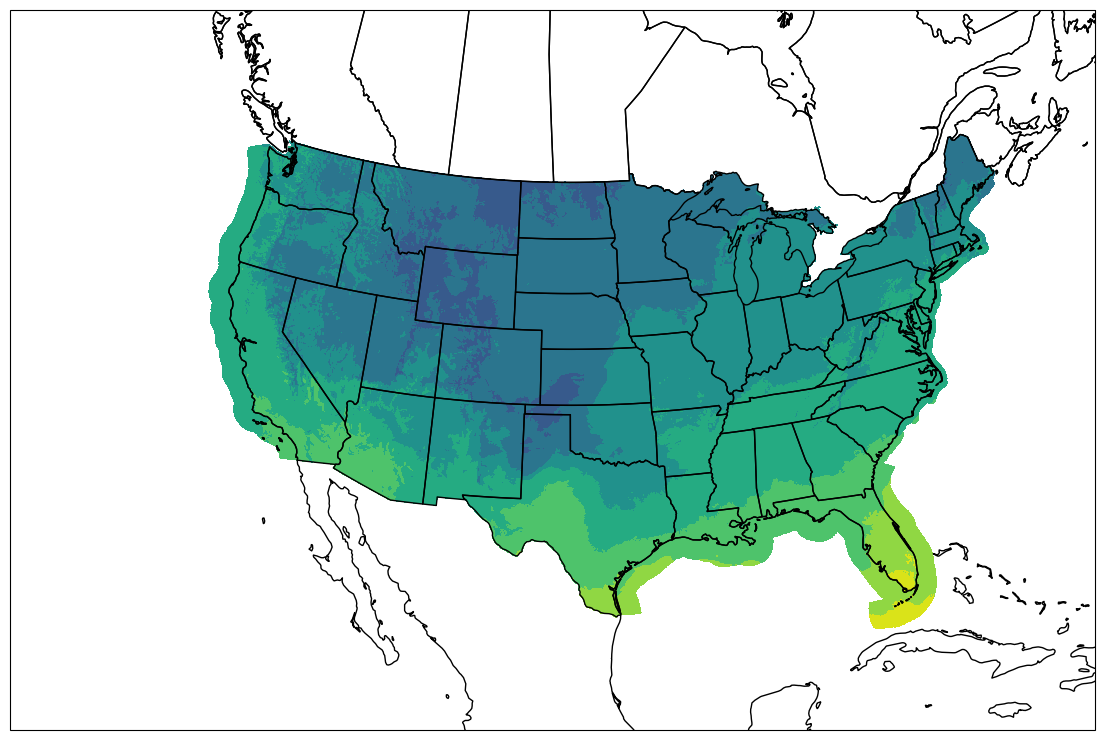

In [12]:
lats, lons = grb.latlons()

map_crs = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35, standard_parallels = (30, 60))

data_crs = ccrs.PlateCarree()

fig = plt.figure(1, figsize = (14, 12))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-130, -72, 20, 55], data_crs)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

ax.contourf(lons, lats, grb.values, transform = data_crs)